In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples = 300,
                 n_features = 2,
                 centers = 2,
                 cluster_std = 1.0, random_state=101)

In [7]:
X,y = data

In [15]:
np.random.seed(seed=101)

z_noise = np.random.normal(size = len(X))
z_noise = pd.Series(z_noise)

In [16]:
feat = pd.DataFrame(X)

In [18]:
feat = pd.concat([feat,z_noise],axis = 1)

In [20]:
feat.columns = ['X1','X2','X3']

In [21]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


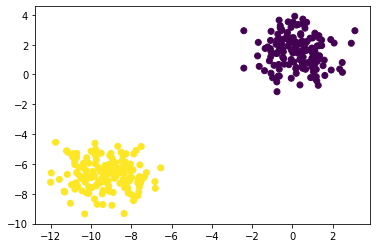

In [23]:
plt.scatter(feat['X1'],feat['X2'], c=y)

In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


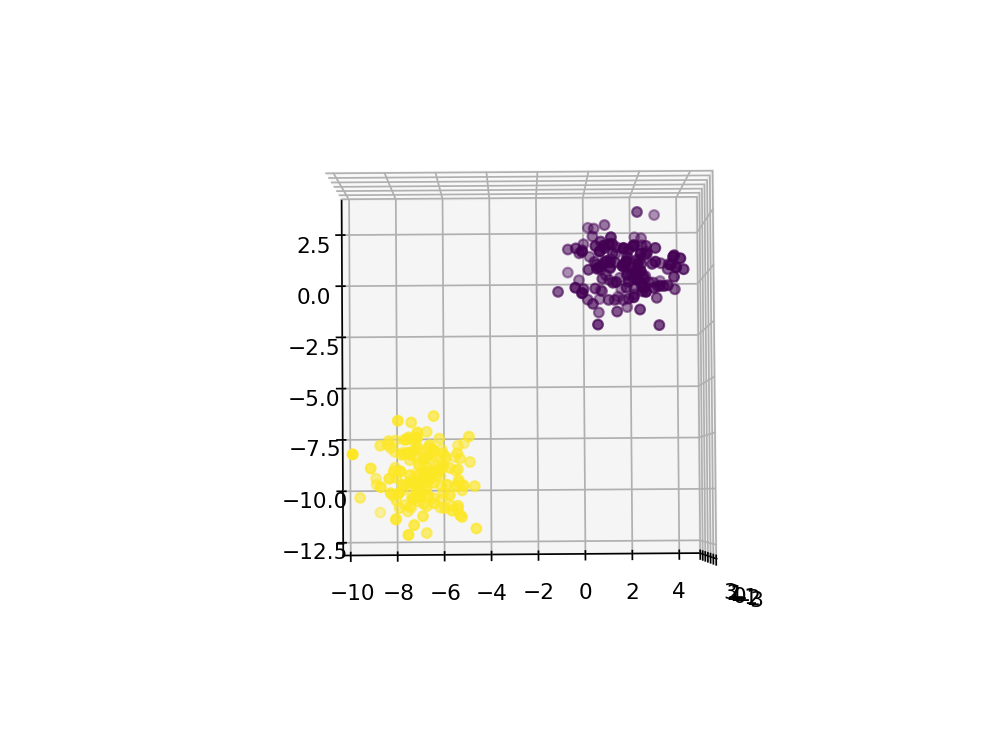

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
from tensorflow.keras.optimizers import SGD

In [32]:
encoder = Sequential()
encoder.add(Dense(units = 2,activation = 'relu',input_shape=[3]))

In [33]:
decoder = Sequential()
decoder.add(Dense(units = 3, activation ='relu', input_shape = [2]))

In [35]:
autoencoder =Sequential([encoder,decoder])

In [36]:
autoencoder.compile(loss = 'mse',optimizer = SGD(lr=1.5))

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [40]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 975us/step - loss: 0.2474
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2417
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2336
Epoch 4/5
10/10 [==============================] - 0s 987us/step - loss: 0.1551
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1334


In [41]:
encoded_2dim = encoder.predict(scaled_data)

In [43]:
encoded_2dim.shape

(300, 2)

In [44]:
scaled_data.shape

(300, 3)

<IPython.core.display.Javascript object>


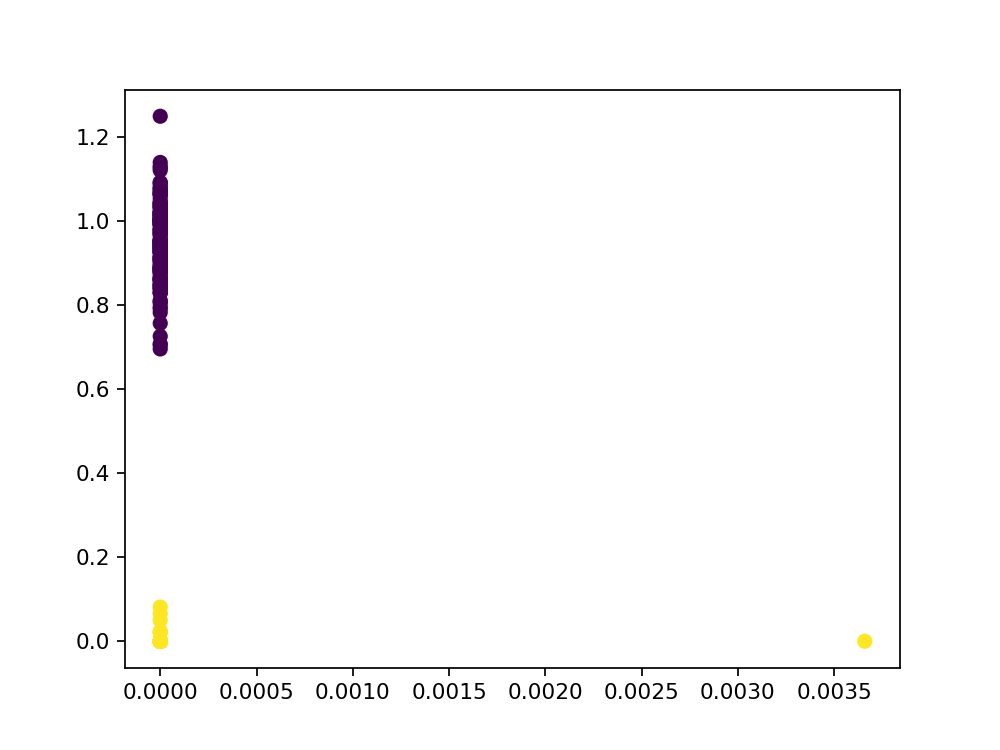

In [46]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c =y)